In [1]:
import torch
from torch import nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt

from lib.models import ConvNet
from lib.train import train
from lib.BB import BB
from lib.AdaHessian import AdaHessian
import warnings
warnings.filterwarnings("ignore")

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [3]:
cifar_trainset = datasets.CIFAR10(root='data', train=True, download=True, transform=transform)
cifar_testset = datasets.CIFAR10(root='data', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
len(cifar_trainset), len(cifar_testset)

(50000, 10000)

In [5]:
train_dataloader = torch.utils.data.DataLoader(cifar_trainset, batch_size=256, shuffle=True)
valid_dataloader = torch.utils.data.DataLoader(cifar_testset, batch_size=256, shuffle=False)

In [6]:
device = 'cuda:1'

In [7]:
optims = ['Adam', 'SGD', 
          'SGD momentum', 
          'LBFGS', 'AdaHessian', 'BB']

In [8]:
def init_optim(optim, model):
    if optim == 'Adam':
        optimizer = torch.optim.Adam(model.parameters(), lr = 5e-4)
    elif optim == 'SGD':
        optimizer = torch.optim.SGD(model.parameters(), lr = 1e-2)
    elif optim == 'momentum':
        optimizer = torch.optim.SGD(model.parameters(), momentum = 0.9, lr = 1e-2)
    elif optim == 'LBFGS':
        optimizer = torch.optim.LBFGS(model.parameters(), lr = 1e-2)
    elif optim == 'AdaHessian':
        optimizer = AdaHessian(model.parameters(), lr = 1e-1)
    elif optim == 'BB':
        optimizer = BB(model.parameters(), lr = 1e-2)
    return optimizer

In [ ]:
#main loop with all optimizers
results = {}
criterion = nn.CrossEntropyLoss()
for optim in optims:
    model = ConvNet()
    model.to(device)
    optimizer = init_optim(optim, model)
    res = train(model, optimizer, criterion, train_dataloader, 
            valid_dataloader, device, optim=optim, epochs=40, verbose=True)
    results[optim] = res

  0%|          | 0/40 [00:00<?, ?it/s]

Epoch: 0, train_loss: 1.770034415989506,valid_loss: 1.5421645849943162, f1: 0.4458195387566226, time: 6.916186332702637
Epoch: 1, train_loss: 1.4667656531139297,valid_loss: 1.3997576147317887, f1: 0.49321649222983616, time: 7.240732908248901
Epoch: 2, train_loss: 1.3683408462271398,valid_loss: 1.3296643882989883, f1: 0.5206783041172889, time: 6.933217287063599
Epoch: 3, train_loss: 1.2970743811860377,valid_loss: 1.2877200186252593, f1: 0.5319954708996933, time: 6.8770763874053955
Epoch: 4, train_loss: 1.2321072385019185,valid_loss: 1.230328980088234, f1: 0.5472215909248377, time: 6.906421661376953
Epoch: 5, train_loss: 1.1824650731013746,valid_loss: 1.190648365020752, f1: 0.5776691858351645, time: 7.02487325668335
Epoch: 6, train_loss: 1.1285844630732829,valid_loss: 1.1552686363458633, f1: 0.5879955124074938, time: 7.0372560024261475
Epoch: 7, train_loss: 1.084281059552212,valid_loss: 1.1357782155275344, f1: 0.5894508698818235, time: 7.130155801773071
Epoch: 8, train_loss: 1.0498686657

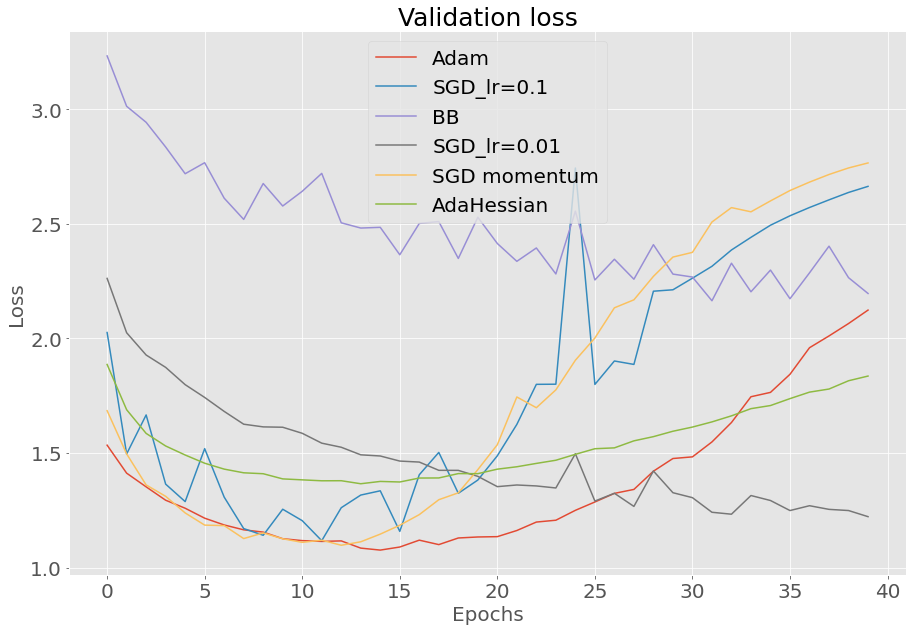

In [16]:
optims = ['Adam', 'SGD_lr=0.1', 'BB',
          'SGD_lr=0.01', 'SGD momentum', 'AdaHessian']

plt.figure(figsize=(15,10))
plt.style.use('ggplot')
for optim in optims:
    res = torch.load(f'results/{optim}_results')
    plt.plot(res['valid'], label = optim)
#     plt.tytle('Train loss', fontsize=20)
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.title('Validation loss', fontsize=25)
plt.show()

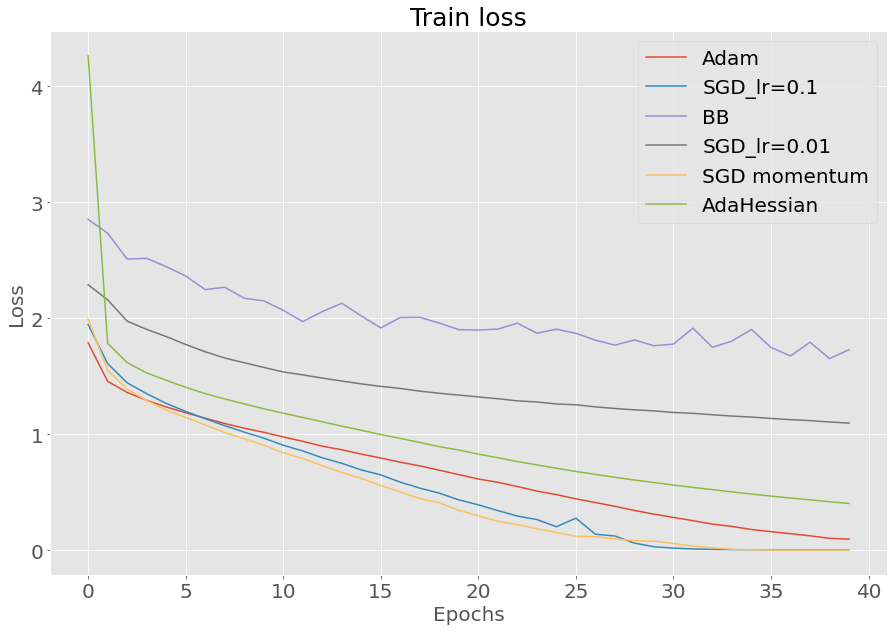

In [13]:
optims = ['Adam', 'SGD_lr=0.1', 'BB',
          'SGD_lr=0.01', 'SGD momentum', 'AdaHessian']

plt.figure(figsize=(15,10))
plt.style.use('ggplot')
for optim in optims:
    res = torch.load(f'results/{optim}_results')
    plt.plot(res['train'], label = optim)
#     plt.tytle('Train loss', fontsize=20)
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.title('Train loss', fontsize=25)
plt.show()

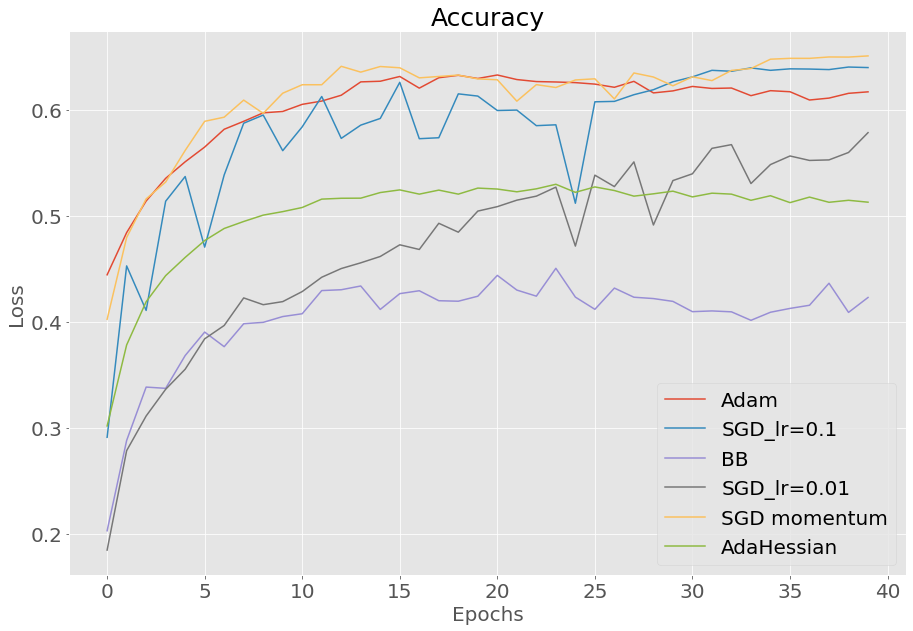

In [15]:
optims = ['Adam', 'SGD_lr=0.1', 'BB',
          'SGD_lr=0.01', 'SGD momentum', 'AdaHessian']

plt.figure(figsize=(15,10))
plt.style.use('ggplot')
for optim in optims:
    res = torch.load(f'results/{optim}_results')
    plt.plot(res['accuracy'], label = optim)
#     plt.tytle('Train loss', fontsize=20)
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.title('Accuracy', fontsize=25)
plt.show()